['0.4000, 0.4439;', '0.2439, 0.1463;', '0.1707, 0.2293;', '0.2293, 0.7610;', '0.5171, 0.9414;', '0.8732, 0.6536;', '0.6878, 0.5219;', '0.8488, 0.3609;', '0.6683, 0.2536;', '0.6195, 0.2634;']
[[0.4    0.4439]
 [0.2439 0.1463]
 [0.1707 0.2293]
 [0.2293 0.761 ]
 [0.5171 0.9414]
 [0.8732 0.6536]
 [0.6878 0.5219]
 [0.8488 0.3609]
 [0.6683 0.2536]
 [0.6195 0.2634]]
[[0.4    0.4439]
 [0.2439 0.1463]
 [0.1707 0.2293]
 [0.2293 0.761 ]
 [0.5171 0.9414]
 [0.8732 0.6536]
 [0.6878 0.5219]
 [0.8488 0.3609]
 [0.6683 0.2536]
 [0.6195 0.2634]]
[[0.90989217 0.0665213 ]
 [0.27333608 0.36001262]
 [0.85792117 0.94794117]
 [0.93595817 0.83404989]
 [0.82419689 0.71563642]
 [0.44793338 0.09815943]
 [0.62994964 0.52245226]
 [0.62963847 0.48407079]
 [0.93704186 0.41648171]
 [0.99083017 0.92380845]]
j 0
k 0
k 1
hej
k 2
hej
k 3
hej
k 4
hej
k 5
hej
k 6
hej
k 7
hej
k 8
hej
k 9
hej
[8 5 1 7 0 2 6 3 4]
8
5
1
j 1
k 0
hej
k 1
k 2
hej
k 3
hej
k 4
hej
k 5
hej
k 6
hej
k 7
hej
k 8
hej
k 9
hej
[1 0 8 7 5 2 6 4 3]
1
0
8
j 2


hej
k 9
[8 7 6 0 1 2 5 3 4]
8
0
[[ 5.53973035e+01 -2.15997829e+01]
 [-8.64747291e-01  9.00322598e+00]
 [ 8.57921172e-01  9.47941165e-01]
 [ 2.24364412e+01  4.99874153e-01]
 [ 1.43408640e+00  2.67273561e-01]
 [-1.06418915e+02 -1.18423797e+03]
 [-9.03056754e+01  5.20400420e+01]
 [-4.83294460e+01  2.50654915e+01]
 [ 8.93439841e+03  1.78999302e+03]
 [ 9.90830173e-01  9.23808450e-01]]
[[0.1707 0.2293]
 [0.1707 0.2293]
 [0.1707 0.2293]
 [0.1707 0.2293]
 [0.1707 0.2293]
 [0.6195 0.2634]
 [0.1707 0.2293]
 [0.6195 0.2634]
 [0.1707 0.2293]
 [0.1707 0.2293]]


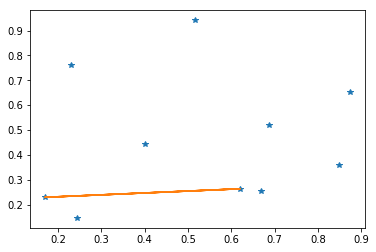

In [64]:
"""1.Input 2, output 10
    2.Neighbourhood is circular
    3. Start with neighbourhood ==2 and go to 1 and then to 0
    4. 
"""

from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches


def load_cities():
    with open("data_lab2/cities.dat") as f:
        rows = f.read().split("\n")[0:-1]
        print(rows)
        rows = [ row[:-1].split(", ") for row in rows ]
        rows = np.array(rows, dtype=float)
        return rows
    
n_neurons = 10
epochs = 10#20 epochs
eta  = 0.2
num_of_neighbours = 2
#use a weight matrix 100x84 init with random number 0 <r<1
w = np.random.rand(10, 2)
#Each row contains the coordinates of one city (value between zero and one).
#cities = np.genfromtxt('data_lab2/cities.dat',delimiter =',')

#cities = np.genfromtxt('data_lab2/cities.dat',dtype=None,delimiter =',',encoding=None)

cities = load_cities()
plt.plot(cities[:,0],cities[:,1],'*')

print(cities)
x = cities.reshape((10,2))
print(x)
print(w)
for n in range(epochs):
    for j, row in enumerate(x):
        #print(row)
        print("j",j)
        hmm = w - row
        #print(hmm)
        min_dist = 100000
        index_of_min = 0
        for i,weight_row in enumerate(hmm):
            #print(weight_row)
            distance = np.linalg.norm(weight_row)
            
            
            if distance < min_dist:
                #print(min_dist)
                min_dist = distance
                index_of_min = i
        #print(w[index_of_min,:] + eta*(w[index_of_min,:]-row))
        #update weights- always update the actual row
        w[index_of_min,:] = w[index_of_min,:] + eta*(w[index_of_min,:]-row)
        #Update the neighbours
        min_dist_to_neighbour = 100000
        index_of_neighbour = 0
        neighbour_distances = np.zeros(9)
        n_index = 0
        for k, neighbour in enumerate(x):
            distance = np.linalg.norm(row-neighbour)
            print("k",k)
            if j != k:
                print("hej")
                
                neighbour_distances[n_index] = distance
                if distance < min_dist_to_neighbour:
                    #print(min_dist)
                    min_dist_to_neighbour = distance
                    index_of_neighbour = k
                n_index +=1
        sorted_indexes = np.argsort(neighbour_distances)
        print(sorted_indexes)
        for index in range(num_of_neighbours+1):
            print(sorted_indexes[index])
            w[sorted_indexes[index],:] = w[sorted_indexes[index],:] + eta*(w[sorted_indexes[index],:]-row)
            
    print(num_of_neighbours)
    if n < epochs/2:
        num_of_neighbours = 2
    elif n < epochs/1.5:
        num_of_neighbours = 1
    else:
        num_of_neighbours = 0
print(w)
#print the animals
winners = np.zeros(10)
for j,row in enumerate(x):
    hmm = w-row
    min_dist = 100000
    index_of_min = 0
    for i,weight_row in enumerate(hmm):
        distance = np.linalg.norm(weight_row)
        #print(i)

        if distance < min_dist:
            min_dist = distance
            index_of_min = i
            #print(min_dist)
            
          
    winners[j] = index_of_min
sorted_cities = np.zeros((10,2))

for i,winner in enumerate(winners):
    #print(i)
    #print(winner)
    #print(int(winner))
    sorted_cities[i,:] = cities[int(winner),:]
print(sorted_cities)
plt.plot(sorted_cities[:,0],sorted_cities[:,1])